In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean, stdev

def normalization_z_score(dataset, mean_values, std_values):
    dataset_copy = dataset.copy()
    dataset_copy = (dataset_copy-mean_values) / std_values
    return dataset_copy, mean_values, std_values

def normalization_min_max(dataset, min_values, max_values):
    dataset_copy = dataset.copy()
    dataset_copy = (dataset_copy-min_values) / (max_values-min_values)
    return dataset_copy, min_values, max_values

def apply_normalization_min_max(dataset, min_values, max_values):
    dataset_copy = dataset.copy()
    dataset_copy = (dataset_copy-min_values) / (max_values-min_values)
    return dataset_copy

def denormalization_z_score(dataset, mean_values, std_values):
    dataset_copy = dataset.copy()
    return (dataset_copy*std_values) + mean_values

def denormalization_min_max(dataset, min_values, max_values):
    dataset_copy = dataset.copy()
    return (dataset_copy*(max_values - min_values)) + min_values

In [2]:
penguins_dataset = np.genfromtxt('penguins.csv', delimiter=',', skip_header=0)
min_values = np.min(penguins_dataset, axis=0)
max_values = np.max(penguins_dataset, axis=0)
penguins_dataset_normalized, min_values, max_values = normalization_min_max(penguins_dataset, min_values, max_values)
penguins_dataset_normalized.shape

(333, 5)

In [14]:
class PCA:
    def __init__(self, cov_matrix, projection_matrix, explained_variance, results_components):
        self.projection_matrix = projection_matrix
        self.cov_matrix = cov_matrix
        self.explained_variance = explained_variance
        self.results_components = results_components
    
  
    def train(self, X, m_size=2, **kwargs):

        self.cov_matrix = np.cov(X.T)
        auto_values, auto_vectors = np.linalg.eigh(self.cov_matrix)
        
        auto_values_indexes = auto_values.argsort()[-m_size:][::-1]
        
        self.projection_matrix = auto_vectors[auto_values_indexes,:]
        self.explained_variance = sum(auto_values[auto_values_indexes])
        
        result_components = np.empty((0,self.projection_matrix.shape[0]))
        
        for each_pattern in X:
            result_components = np.r_[result_components, ((self.projection_matrix@np.c_[each_pattern]).T)]
        
        self.results_components = result_components
        
        return None
    

In [15]:
x_scaled_train = penguins_dataset_normalized[:,:-1]
pca = PCA(None, None, None, None)
pca.train(x_scaled_train, m_size=2)

# Item A

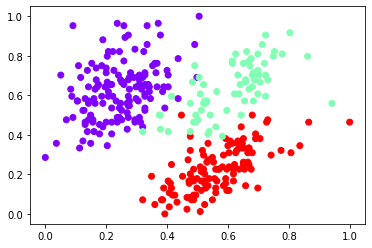

In [16]:
plt.scatter(x_scaled_train[:,[0]],x_scaled_train[:,[1]], c=penguins_dataset[:,[-1]], cmap='rainbow')

# Item B

In [18]:
variance_results = []
for i in range(1,5):
    x_scaled_train = penguins_dataset_normalized[:,:-1]
    pca = PCA(None, None, None, None)
    pca.train(x_scaled_train, m_size=i)
    variance_results.append(pca.explained_variance)

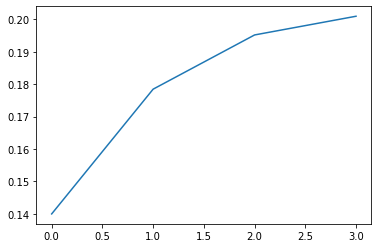

In [20]:
fig = plt.figure()
ax = plt.axes()

ax.plot(variance_results);